In [1]:
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

## 0. Load datset

In [2]:
# Load dataset

train = datasets.KMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test = datasets.KMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
classes = [
    "お",
    "き",
    "す",
    "つ"
    "な",
    "は",
    "ま",
    "や",
    "ね",
    "を"
]

classes = [
    "o",
    "ki",
    "su",
    "tsu"
    "na",
    "ha",
    "ma",
    "ya",
    "ne",
    "wo"
]

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'o')

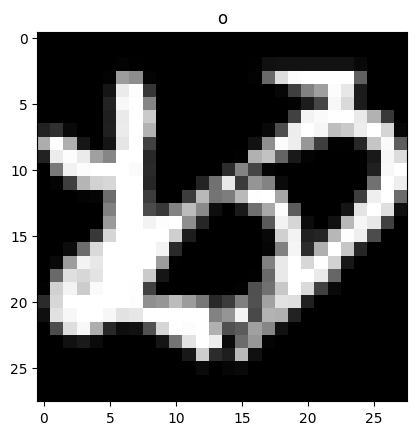

In [4]:
image, label = train[2]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes[label])

In [5]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [16]:
device = torch.device('mps')

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_pred) * 100

def train_model(model, optimizer, loss_fn):
    torch.manual_seed(42)
    epochs = 3

    for epoch in range(epochs):
        print(f"[EPOCH {epoch+1}/{epochs}] ", end="")
        train_loss = 0

        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)
            model.train()

            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            train_loss += loss

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

        train_loss /= len(train_dataloader)

        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                X, y = X.to(device), y.to(device)
                test_pred = model(X)

                test_loss += loss_fn(test_pred, y)
                test_acc += accuracy_fn(y, test_pred.argmax (dim=1))

            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)

        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [17]:
model = nn.Sequential(
    nn.Conv2d(1, 10, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(10, 10, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),

    nn.Linear(10*5*5, 80),
    nn.ReLU(),
    nn.Linear(80, 30),
    nn.ReLU(),
    nn.Linear(30, 10)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [18]:
train_model(model, optimizer, loss_fn)

[EPOCH 1/3] Train loss: 0.65873 | Test loss: 0.47808, Test acc: 84.82%
[EPOCH 2/3] Train loss: 0.17774 | Test loss: 0.34935, Test acc: 89.97%
[EPOCH 3/3] Train loss: 0.11889 | Test loss: 0.33876, Test acc: 90.52%
